In [28]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, BasicAer
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_textbook.tools import array_to_latex
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-05-11 04:43:19,714: Credentials are already in use. The existing account in the session will be replaced.


In [29]:
#construimos el circuito con dos registros
q = QuantumRegister(2)
qc = QuantumCircuit(q)
#Aplicamos las dos compuertas H y el CZ
qc.h(q[0])
qc.cz(q[0], q[1])
qc.h(q[0])

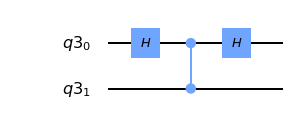

In [30]:
#Dibujo del circuito
qc.draw(output='mpl')

In [31]:
#Mostramos resultado como compuerta unitaria, se puede observar como resultado el CNOT
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()

In [32]:
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

In [33]:
#Resultado del state vector
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

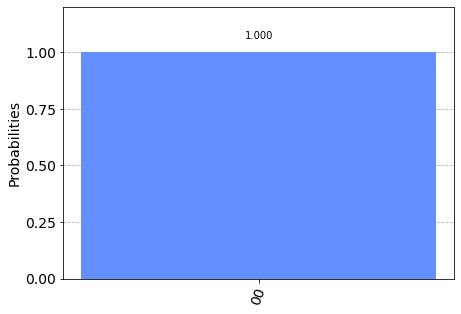

In [34]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)